In [ ]:
#Importing required libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_curve, f1_score, auc, roc_auc_score, precision_recall_curve, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
dataset = pd.read_csv("Unemployment in India.csv")
dataset.shape

(768, 7)

In [ ]:
dataset.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:

# Bar plot of percentage change in unemployment after lockdown by Region
plot_per = g_lock.sort_values('percentage change in unemployment')
fig = px.bar(plot_per, x='Region', y='percentage change in unemployment', color='Region',
             title='Percentage change in Unemployment in each region after lockdown', template='ggplot2')
fig.show()


 Function to sort value based on impact
def sort_impact(x):
    if x <= 10:
        return 'Impacted Regions'
    elif x <= 20:
        return 'Hard Impacted Regions'
    elif x <= 30:
        return 'Harder Impacted Regions'
    elif x <= 40:
        return 'Hardest Impacted Regions'
    return x

plot_per['impact status'] = plot_per['percentage change in unemployment'].apply(lambda x: sort_impact(x))
fig = px.bar(plot_per, y='Region', x='percentage change in unemployment', color='impact status',
             title='Impact of lockdown on employment across regions', template='ggplot2', height=650)
fig.show()
# Creating and training the Random Forest Regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)

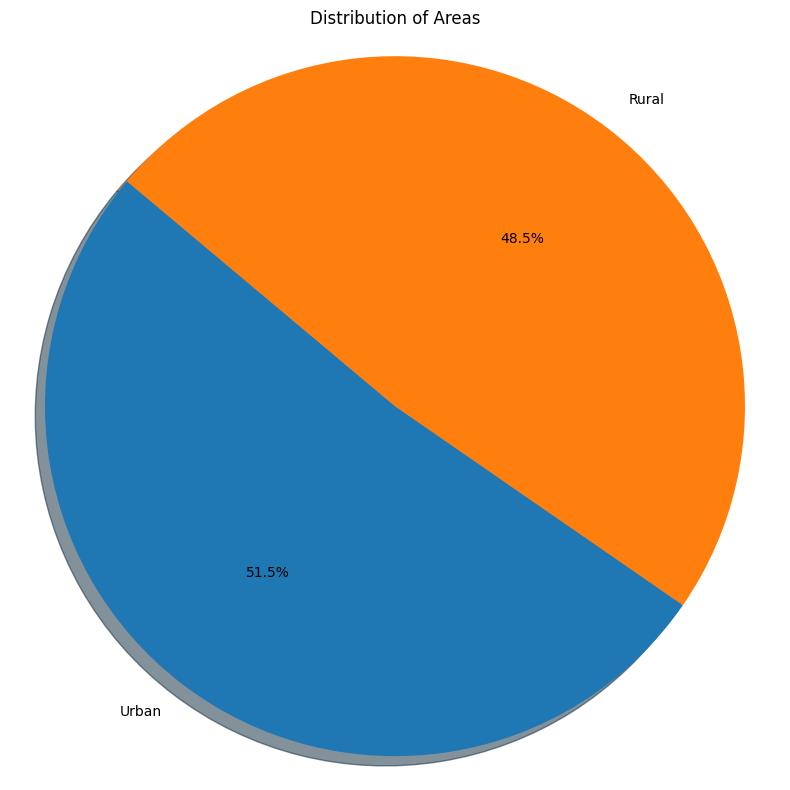

In [ ]:
plt.figure(figsize=(8, 8))
area_counts = dataset['Area'].value_counts()
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Areas')
plt.tight_layout()
plt.show()


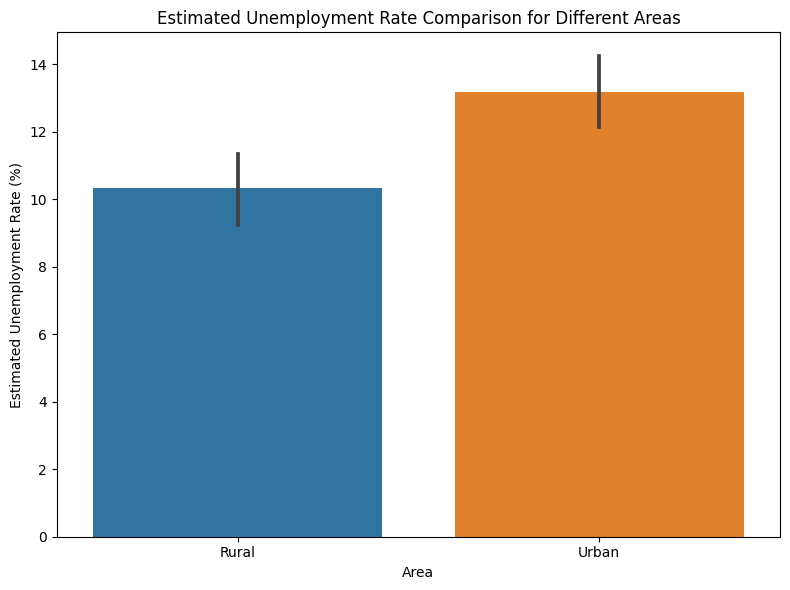

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Area', y=' Estimated Unemployment Rate (%)', data=dataset)
plt.xlabel('Area')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate Comparison for Different Areas')
plt.tight_layout()
plt.show()

In [ ]:
distinct=dataset['Region'].unique()
print(distinct)


['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' nan 'Chandigarh']


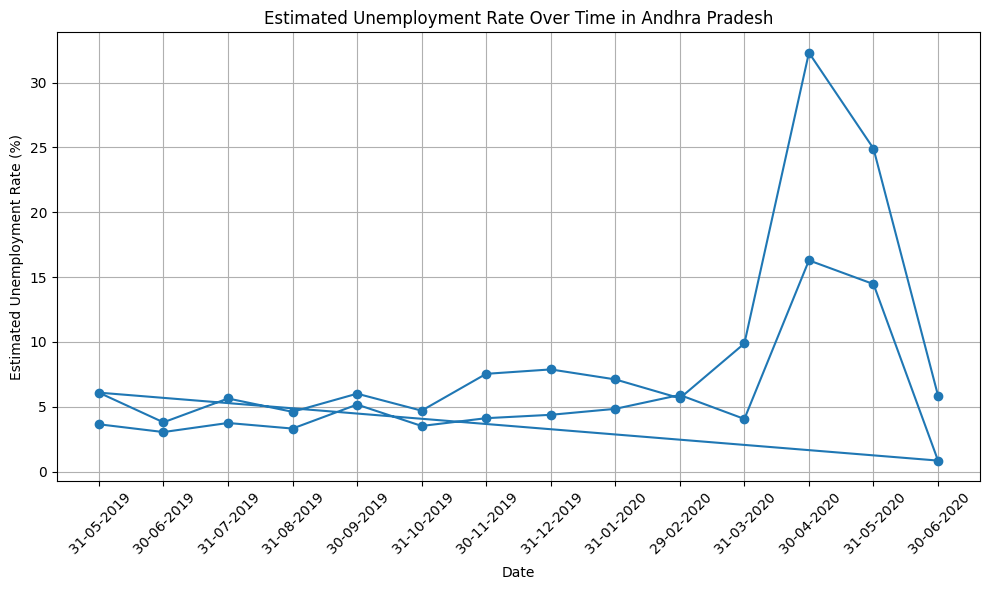

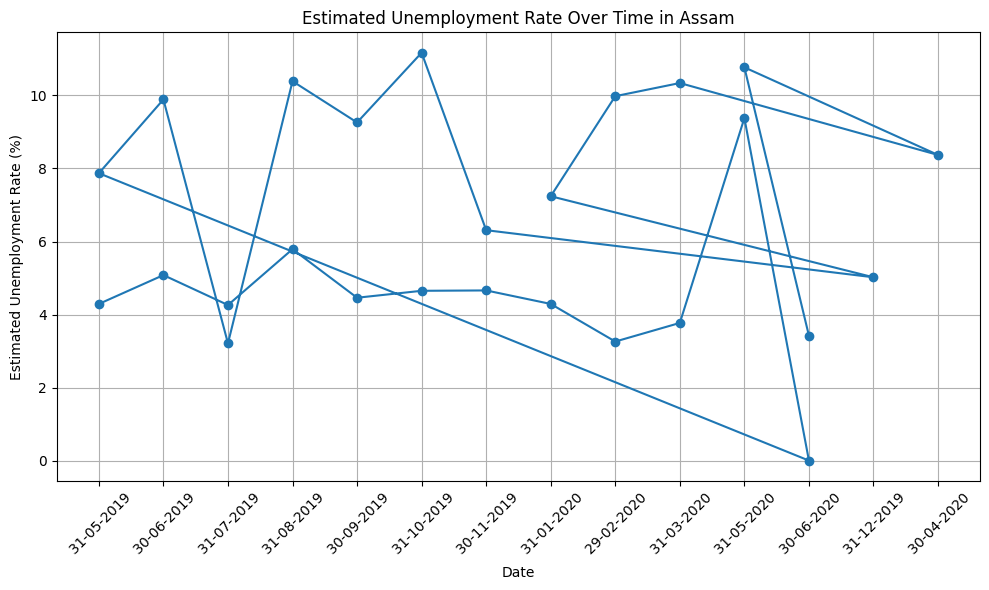

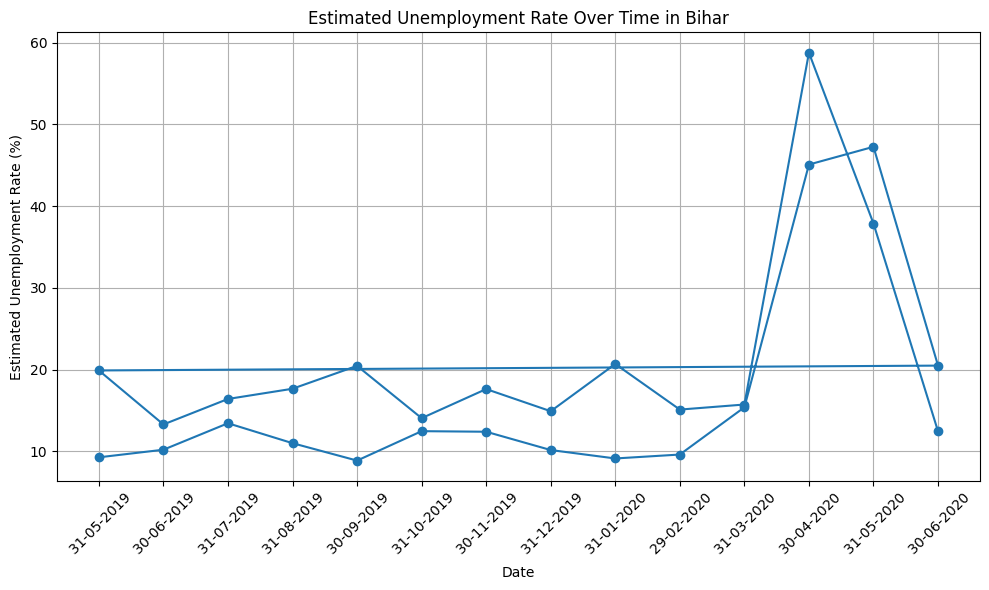

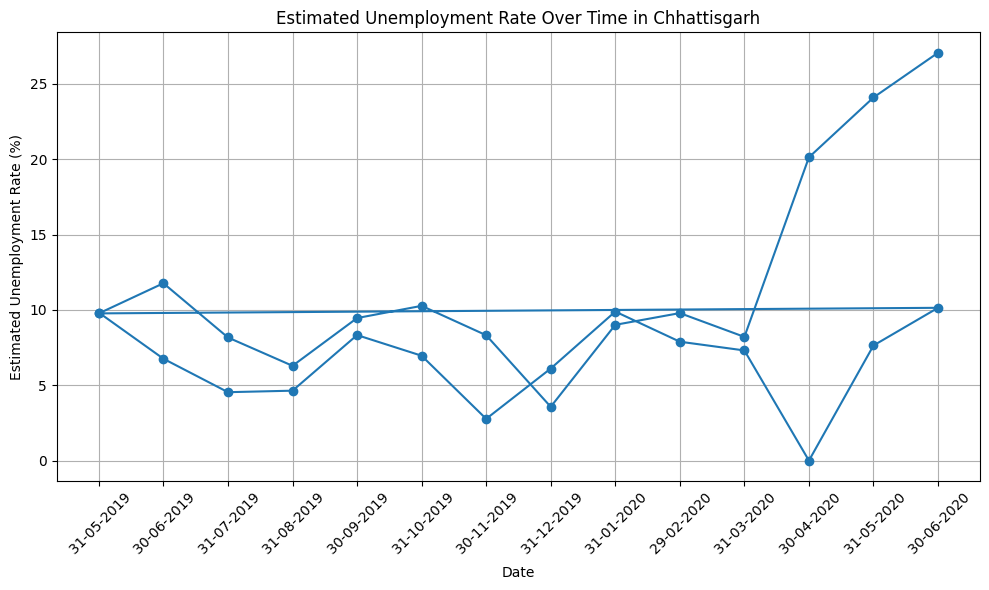

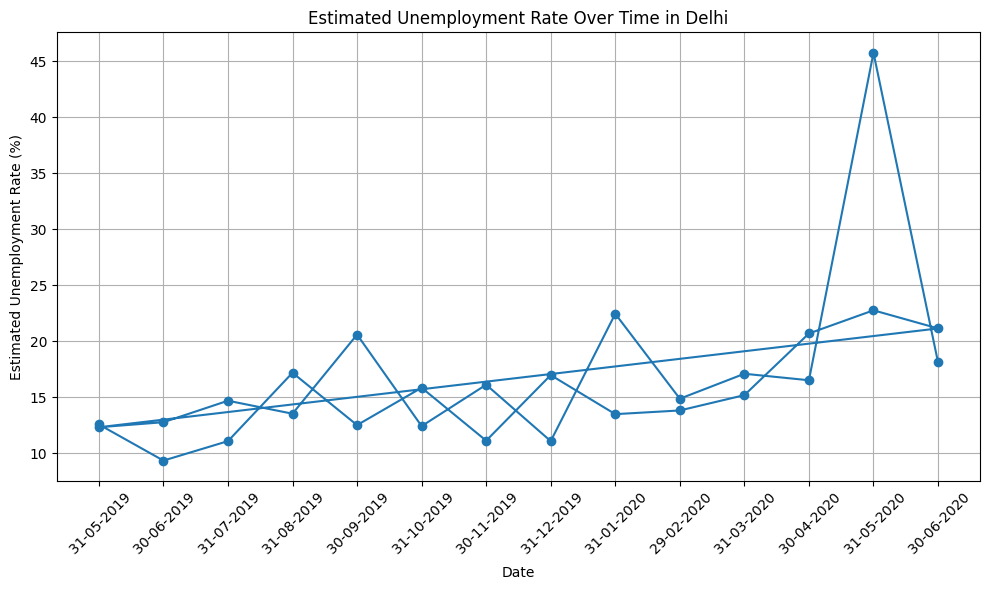

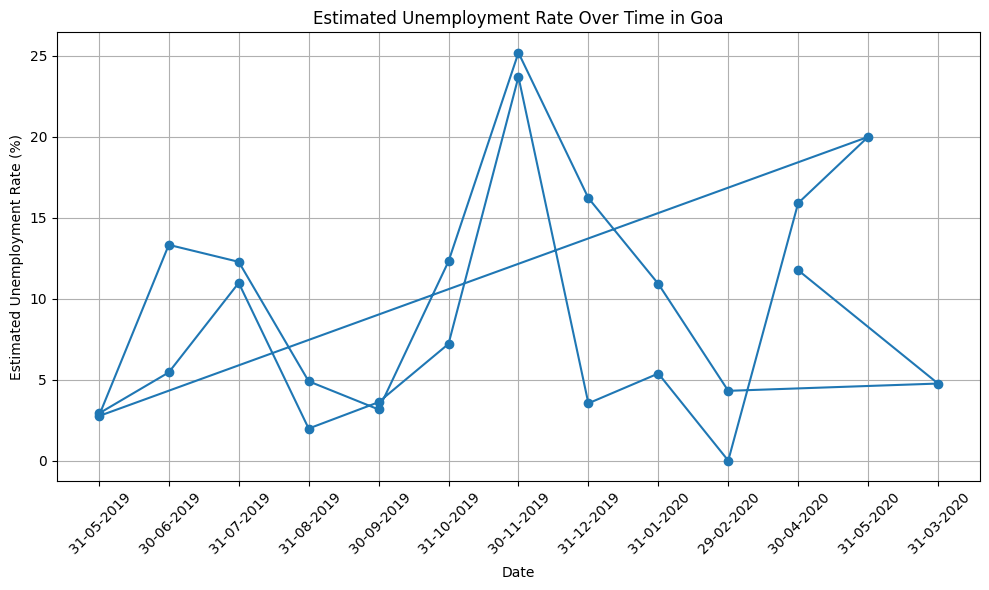

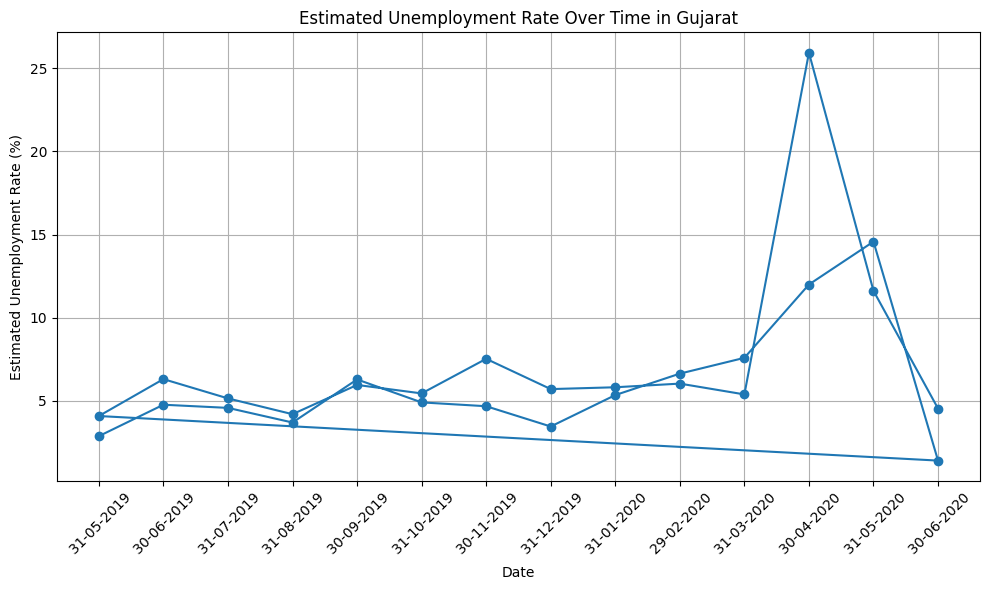

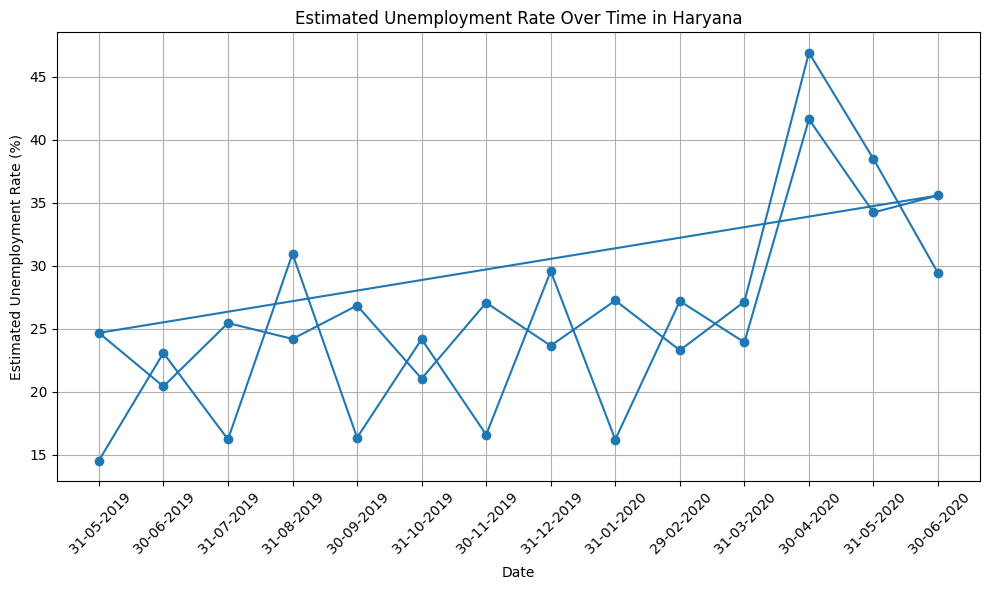

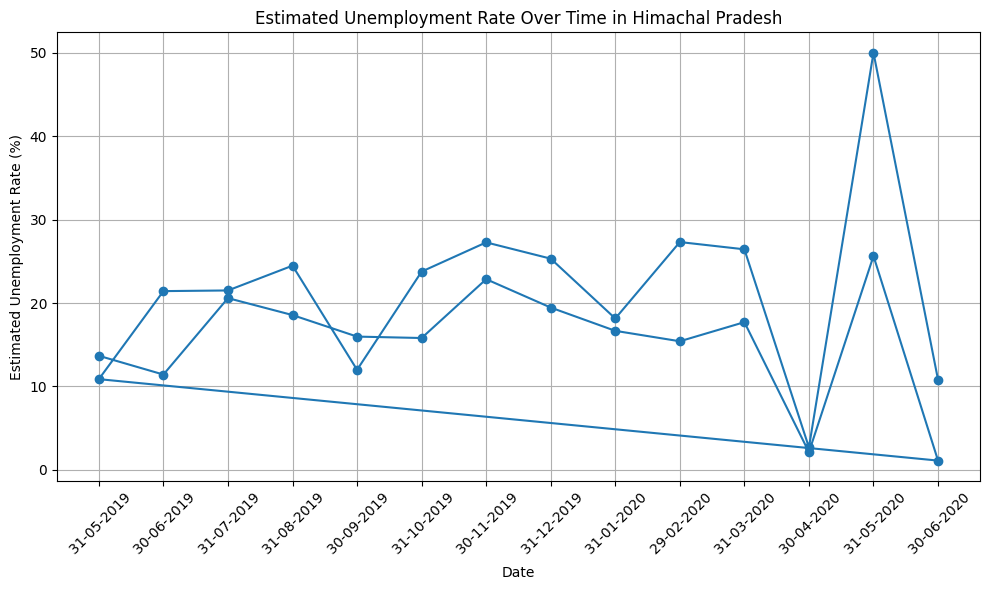

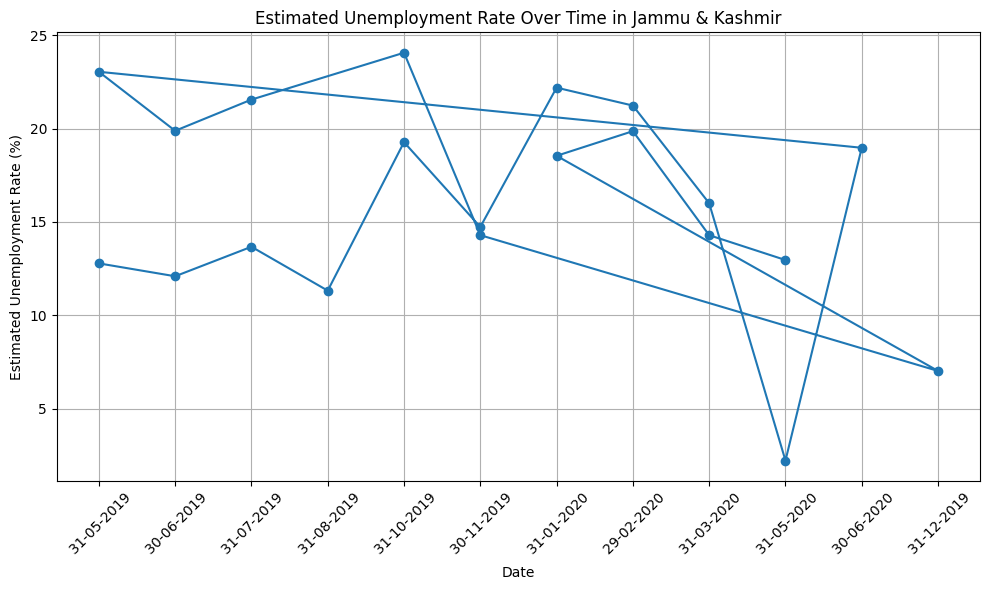

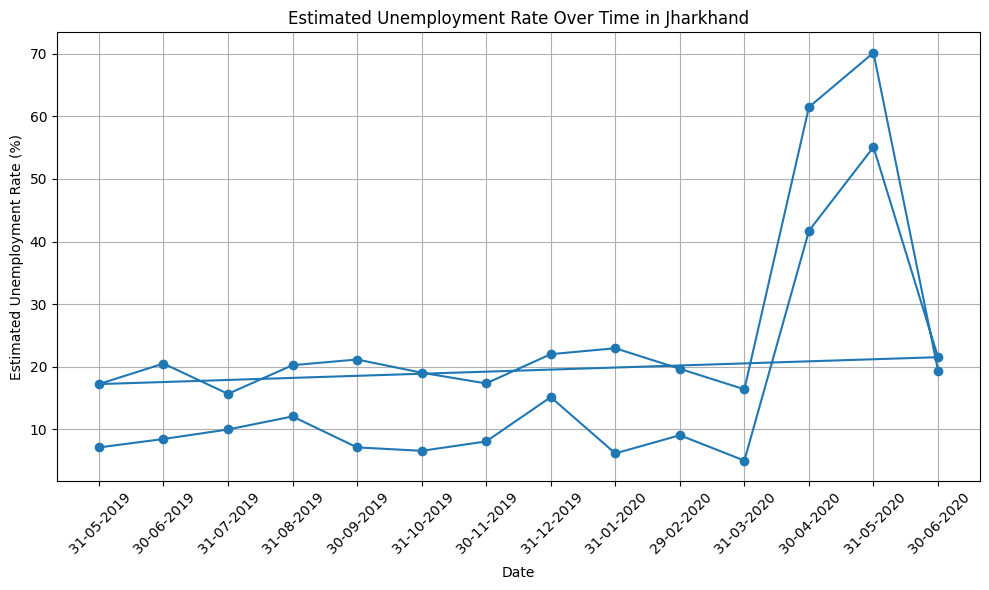

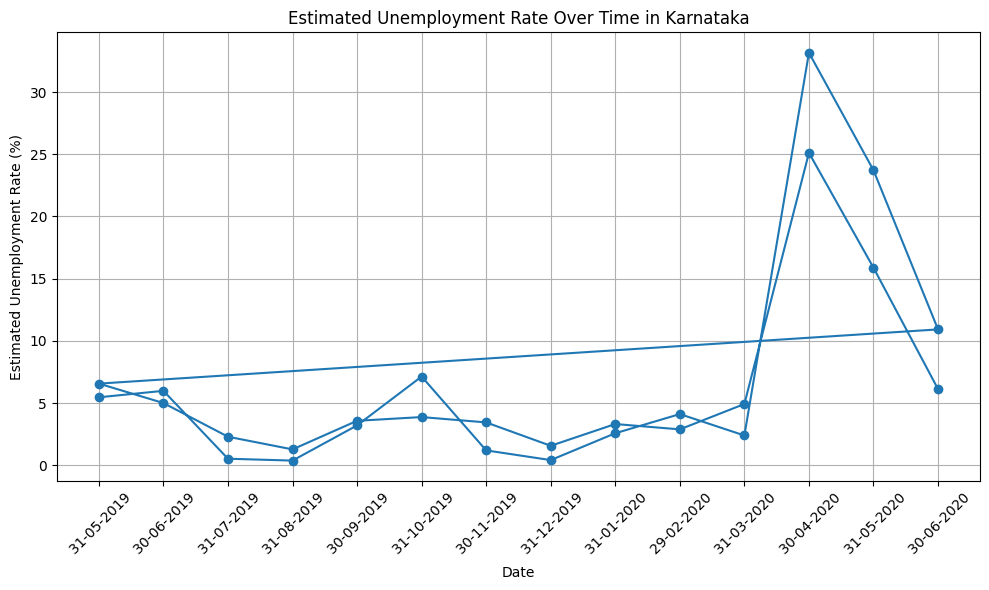

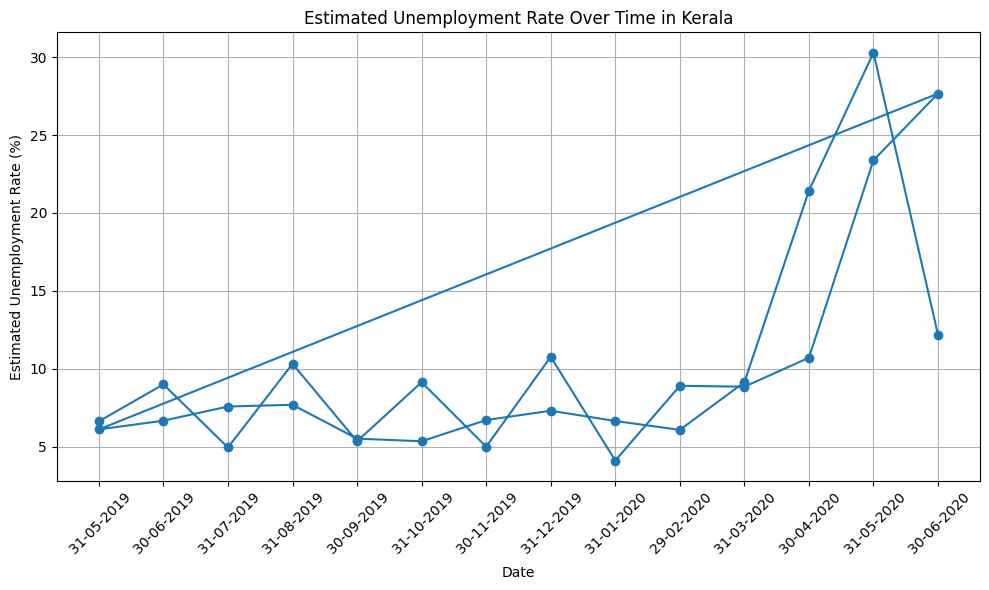

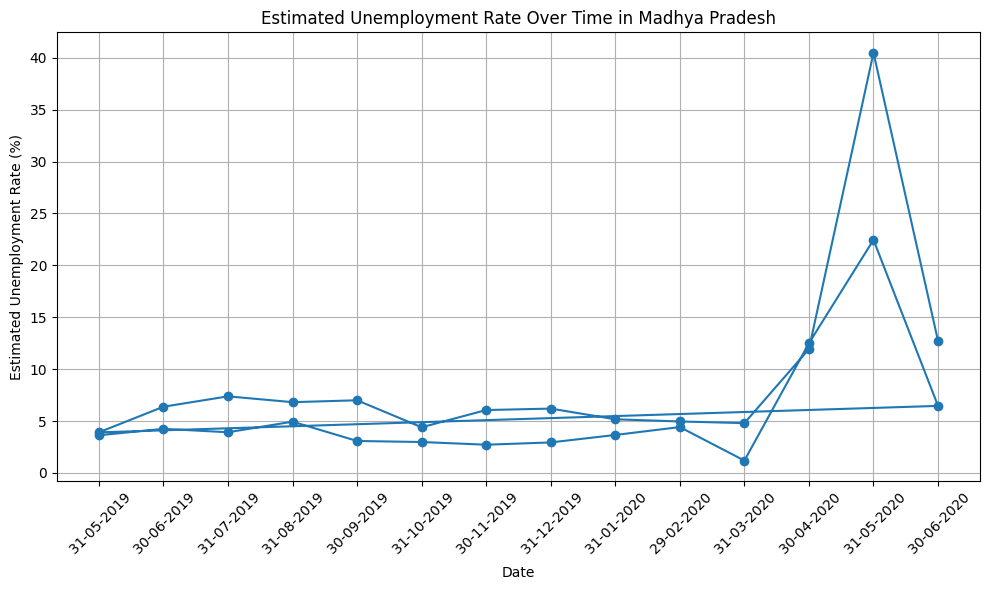

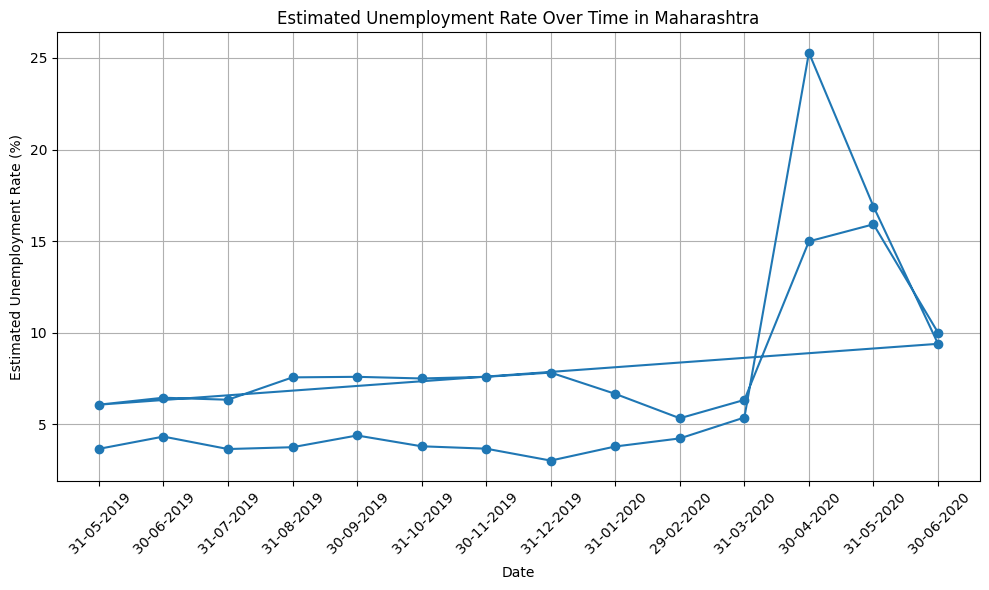

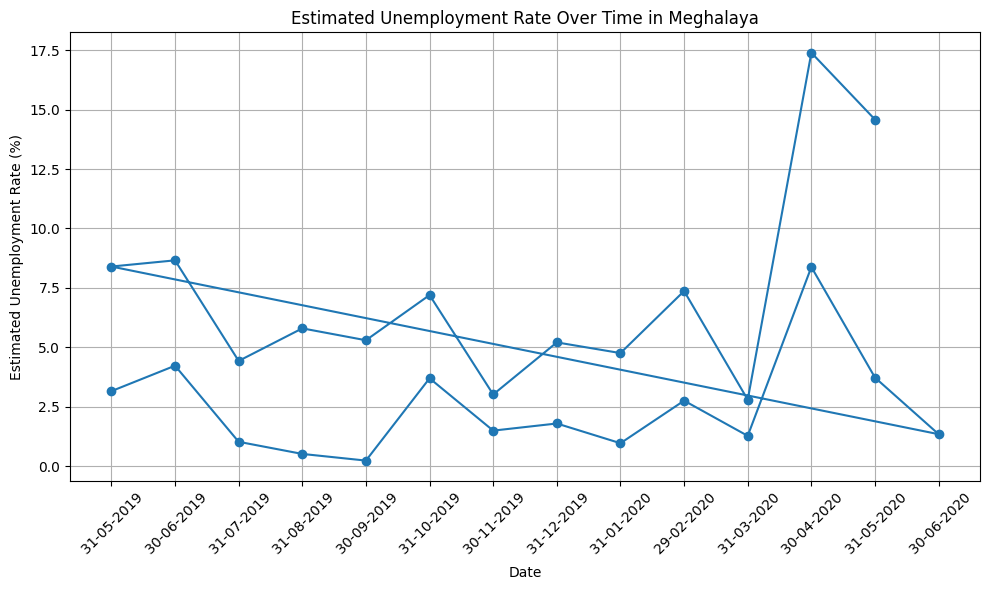

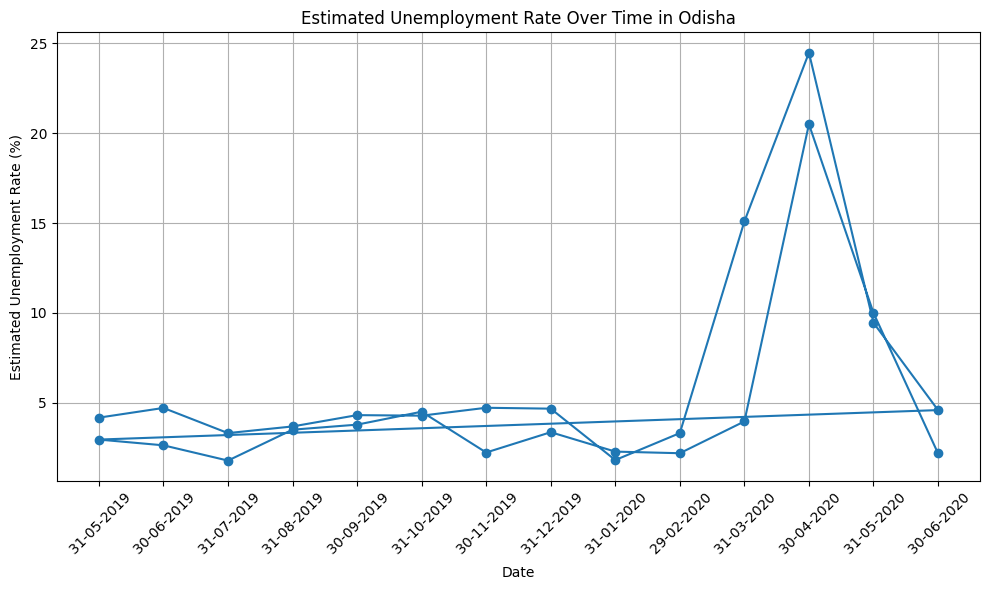

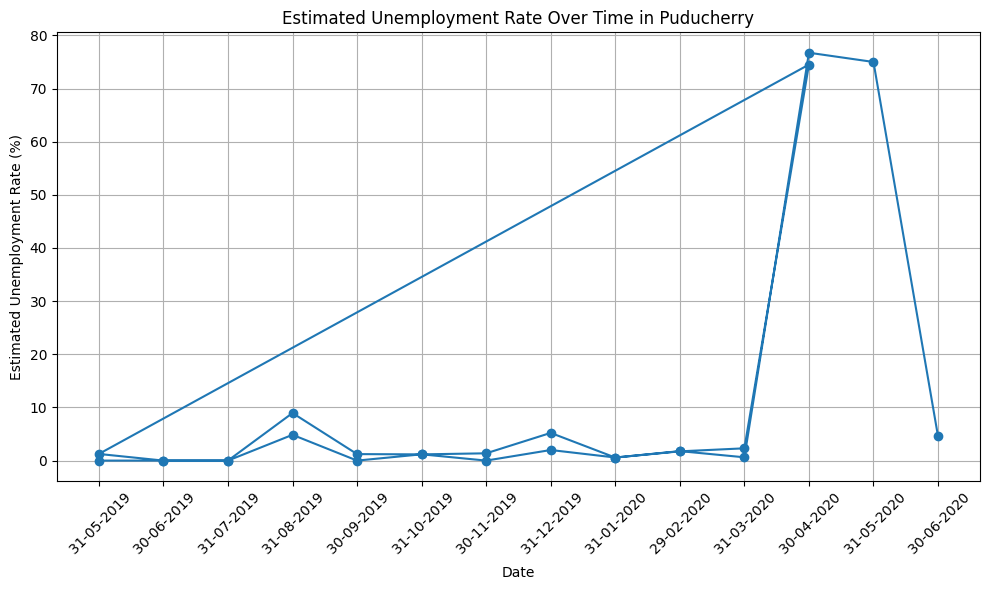

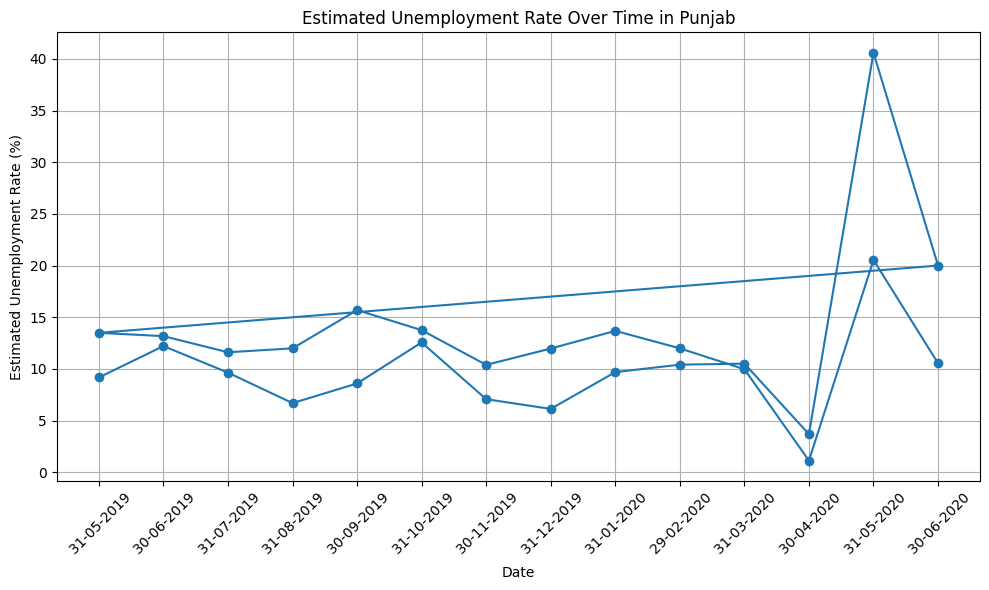

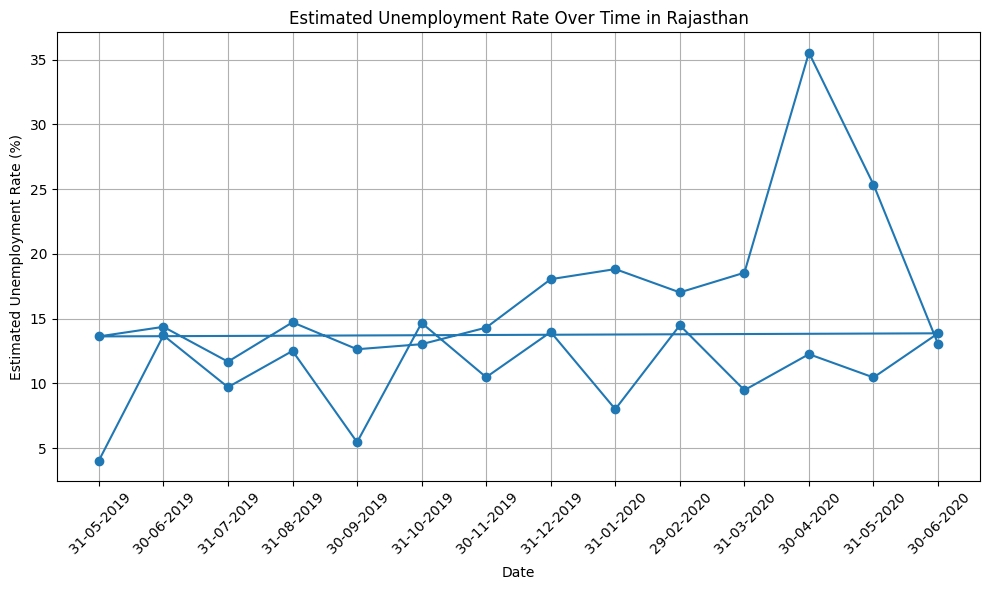

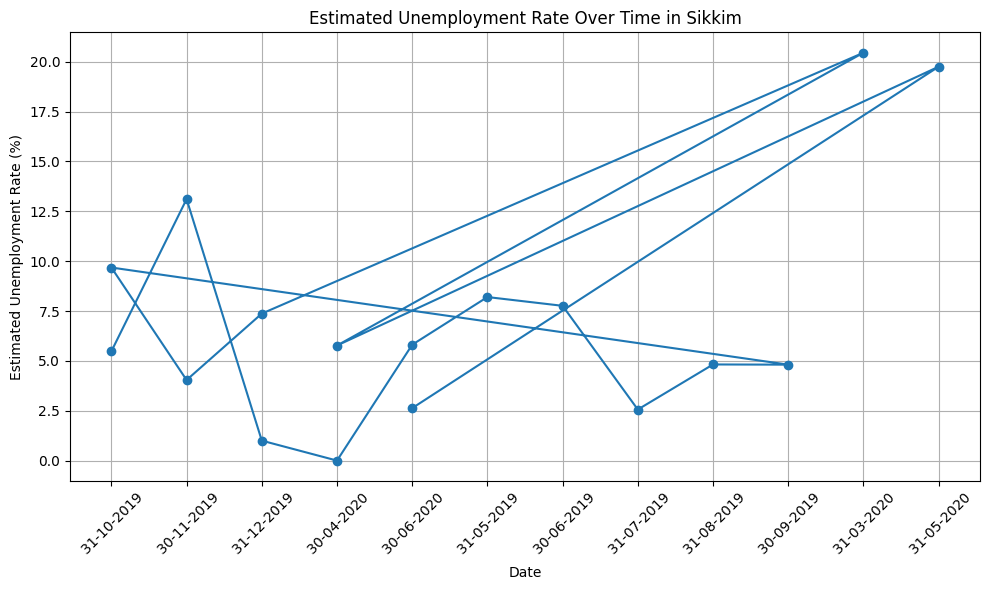

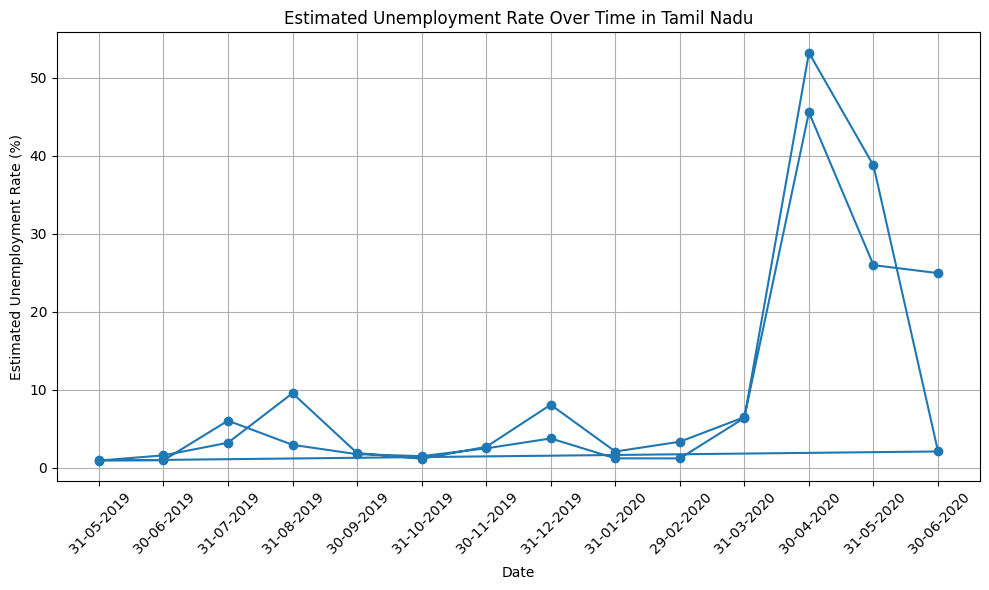

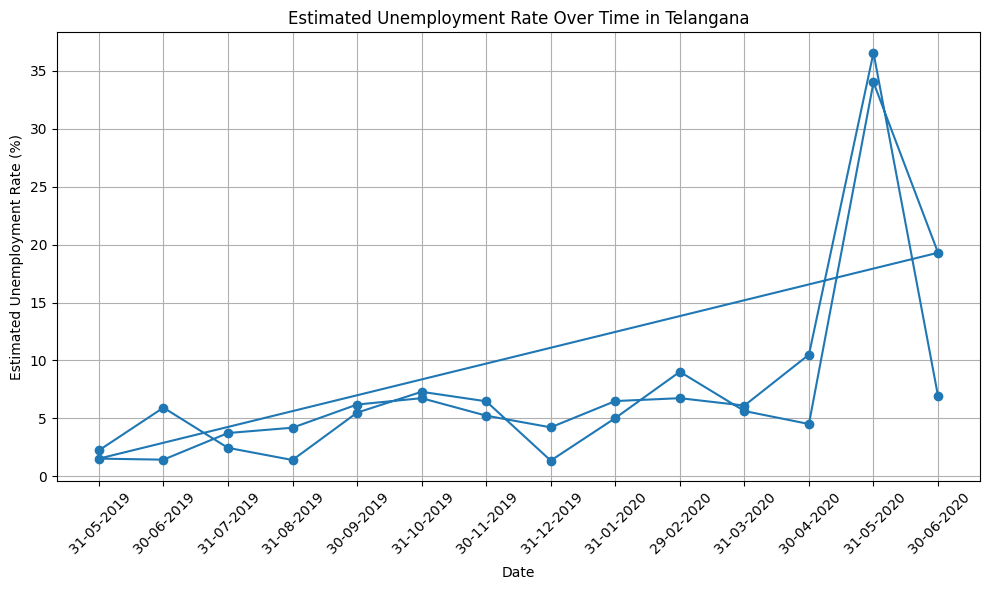

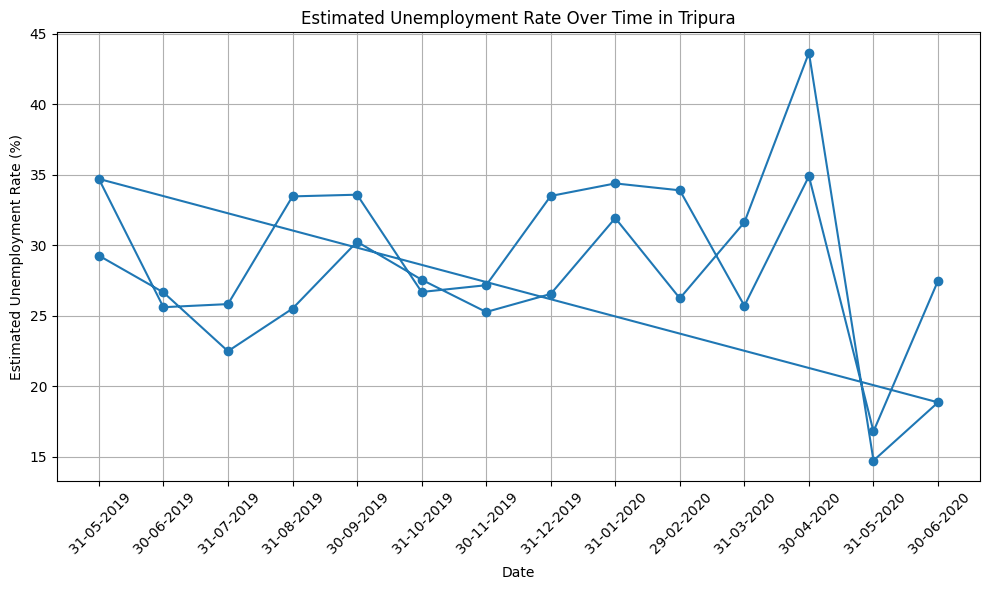

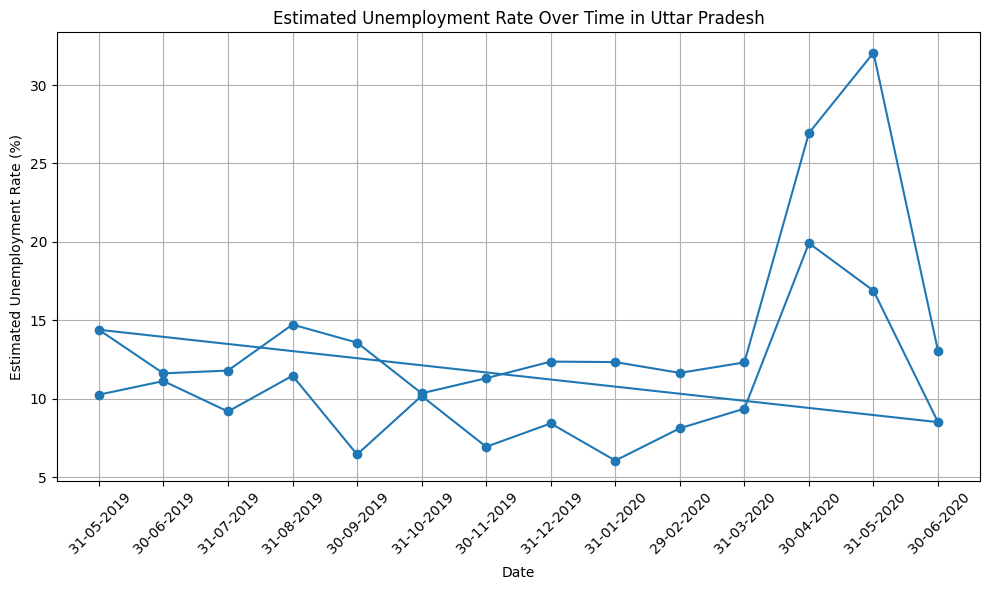

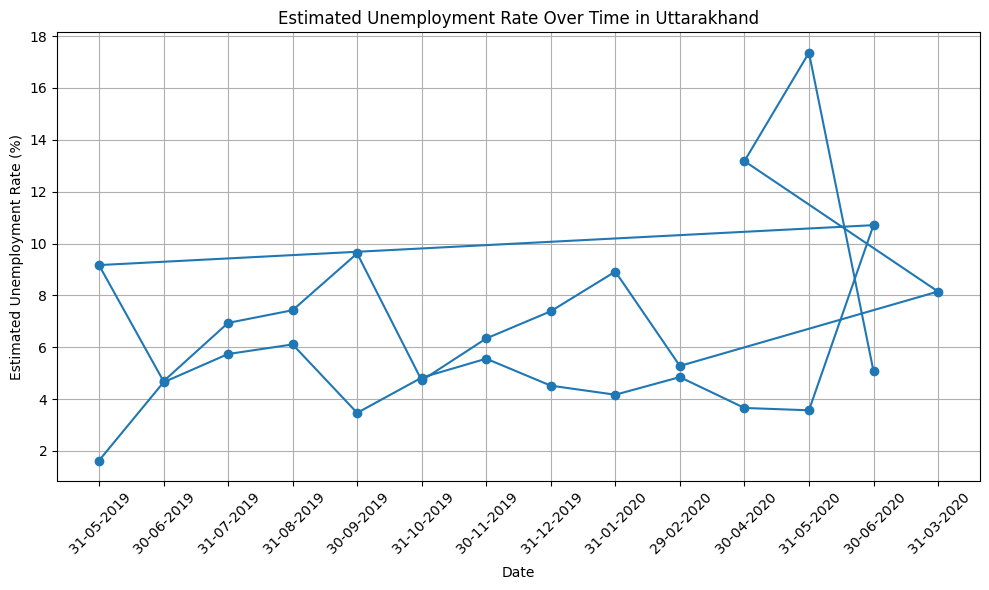

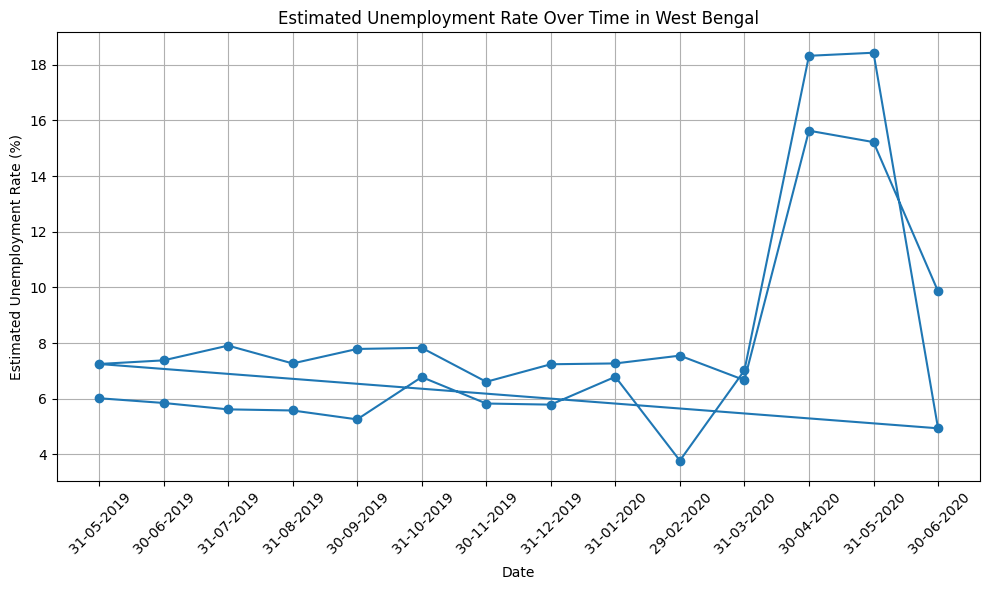

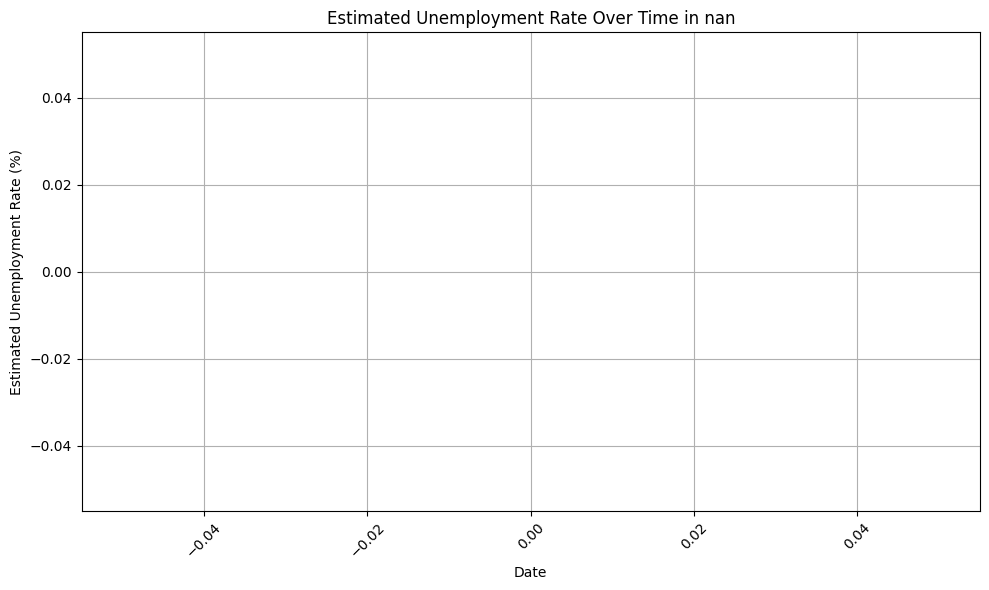

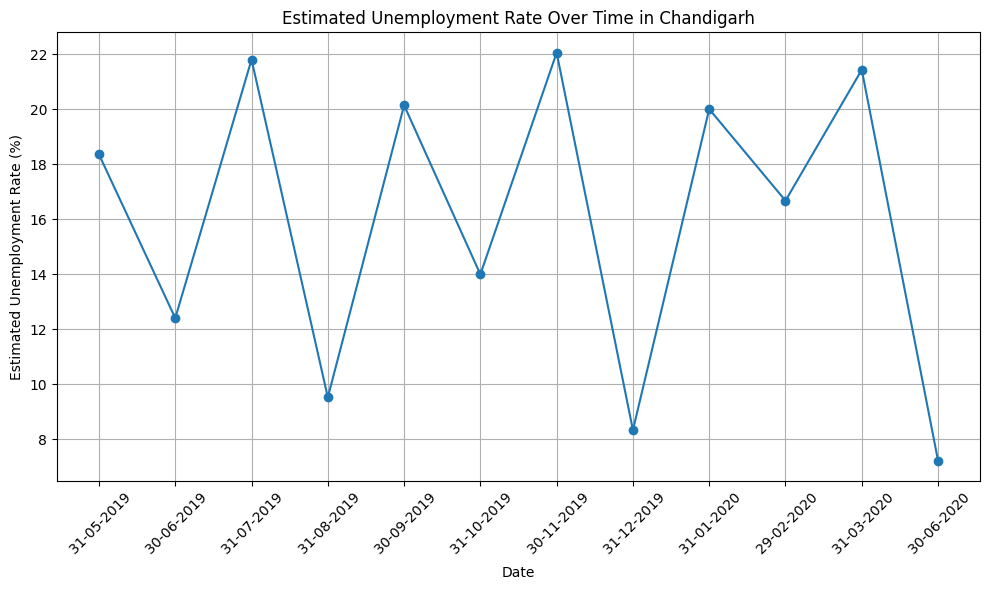

In [ ]:
for regions in distinct:
    data = dataset[dataset['Region'] == regions]
    #print(data.columns)
    plt.figure(figsize=(10, 6))
    plt.plot(data[' Date'], data[' Estimated Unemployment Rate (%)'], marker='o')
    plt.xlabel('Date')
    plt.ylabel('Estimated Unemployment Rate (%)')
    plt.title(f'Estimated Unemployment Rate Over Time in {regions}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import plotly.express as px
# Convert 'Date' column to datetime
dataset[' Date'] = pd.to_datetime(dataset[' Date'])

# Calculate percentage change in unemployment rate
dataset['Percentage Change'] = dataset.groupby('Region')[' Estimated Unemployment Rate (%)'].pct_change() * 100

# Create a bar plot for percentage change in unemployment
plot_per = dataset.sort_values('Percentage Change')
fig1 = px.bar(plot_per, x='Region', y='Percentage Change', color='Region',
              title='Percentage Change in Unemployment in Each Region After Lockdown',
              template='ggplot2')
fig1.show()

# Function to categorize impact status
def categorize_impact(x):
    if x <= 10:
        return 'Impacted Regions'
    elif x <= 20:
        return 'Hard Impacted Regions'
    elif x <= 30:
        return 'Harder Impacted Regions'
    elif x <= 40:
        return 'Hardest Impacted Regions'
    return x

# Apply the impact categorization function to the data
plot_per['Impact Status'] = plot_per['Percentage Change'].apply(lambda x: categorize_impact(x))

# Create a bar plot for impact of lockdown on employment across regions
fig2 = px.bar(plot_per, y='Region', x='Percentage Change', color='Impact Status',
              title='Impact of Lockdown on Employment Across Regions',
              template='ggplot2', height=650)
fig2.show()


In [56]:
label_encoder = LabelEncoder()
dataset['Region_encoded'] = label_encoder.fit_transform(dataset['Region'])
dataset['Frequency_encoded'] = label_encoder.fit_transform(dataset[' Frequency'])
dataset['Area_encoded'] = label_encoder.fit_transform(dataset['Area'])


In [57]:
cleaned_dataset = dataset.dropna()

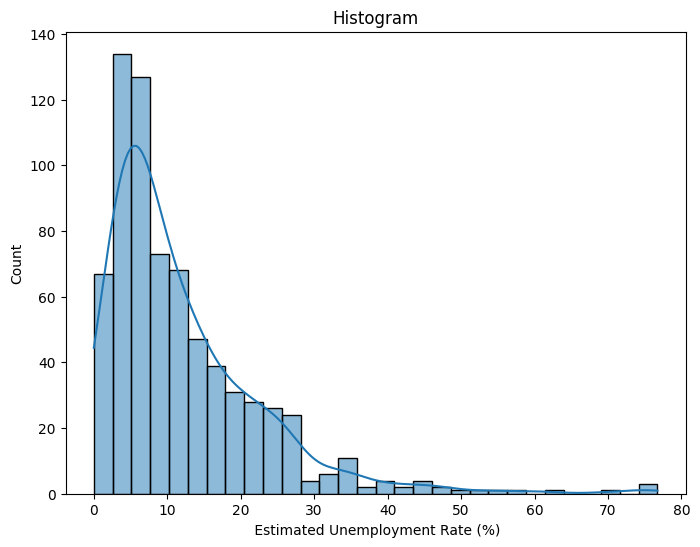

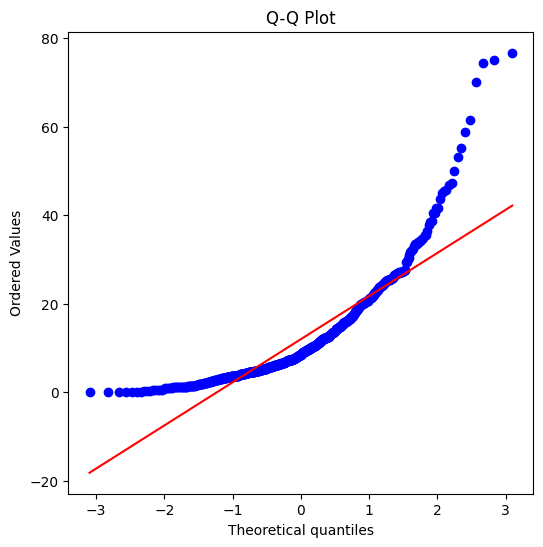

Shapiro-Wilk Test:
Test statistic: 0.8064523935317993
p-value: 2.94164060070903e-28
The dataset is not normally distributed.

Kolmogorov-Smirnov Test:
Test statistic: 0.9048627946477396
p-value: 0.0
The dataset is not normally distributed.

Anderson-Darling Test:
Test statistic: 31.951172664043952
Critical values: [0.573 0.652 0.783 0.913 1.086]
Significance levels: [15.  10.   5.   2.5  1. ]
The dataset is not normally distributed.

Normality Test:
Test statistic: 350.99730566134645
p-value: 6.052063751753816e-77
The dataset is not normally distributed.


In [55]:
#Checking if our dataset is normally distributed
target = cleaned_dataset[' Estimated Unemployment Rate (%)']

# Visual inspection: Histogram
plt.figure(figsize=(8, 6))
sns.histplot(target, kde=True)
plt.title('Histogram')
plt.show()

# Visual inspection: Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(target, plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk test
statistic, p_value = stats.shapiro(target)
alpha = 0.05  # Significance level

print("Shapiro-Wilk Test:")
print("Test statistic:", statistic)
print("p-value:", p_value)

if p_value > alpha:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

# Kolmogorov-Smirnov test
ks_statistic, ks_p_value = stats.kstest(target, 'norm')

print("\nKolmogorov-Smirnov Test:")
print("Test statistic:", ks_statistic)
print("p-value:", ks_p_value)

if ks_p_value > alpha:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

# Anderson-Darling test
ad_statistic, ad_critical_values, ad_significance_levels = stats.anderson(target, dist='norm')

print("\nAnderson-Darling Test:")
print("Test statistic:", ad_statistic)
print("Critical values:", ad_critical_values)
print("Significance levels:", ad_significance_levels)

if ad_statistic < ad_critical_values[2]:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

# Normality test using normaltest
normaltest_statistic, normaltest_p_value = stats.normaltest(target)

print("\nNormality Test:")
print("Test statistic:", normaltest_statistic)
print("p-value:", normaltest_p_value)

if normaltest_p_value > alpha:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

In [64]:
cleaned_dataset.describe()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),change_in_employed,percentage_change_employed,Percentage Change,Region_encoded,Frequency_encoded,Area_encoded
count,708.000000,7.080000e+02,708.000000,7.080000e+02,708.000000,708.000000,708.000000,708.000000,708.000000
mean,12.018912,7.134297e+06,42.537952,-2.099432e+05,-21.027658,inf,13.699153,0.533898,0.533898
std,10.825882,8.002189e+06,8.109579,1.961221e+06,327.918630,NaN,8.052947,0.499202,0.499202
min,0.000000,4.942000e+04,13.330000,-2.851766e+07,-7293.240669,-100.000000,0.000000,0.000000,0.000000
25%,4.750000,1.208240e+06,37.997500,-2.402342e+05,-6.022329,-26.416645,7.000000,0.000000,0.000000
50%,8.550000,4.699982e+06,41.115000,-8.540500e+03,-0.721333,1.671078,14.000000,1.000000,1.000000
75%,16.212500,1.117132e+07,45.422500,1.824970e+05,5.579711,37.898372,20.250000,1.000000,1.000000
max,76.740000,4.577751e+07,72.570000,6.572247e+06,2135.815338,inf,27.000000,1.000000,1.000000
